In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


# Floresta para Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00102489 -0.00081224 -0.00108896 -0.00103093 -0.00120538 -0.0013907
 -0.00136946 -0.00091754 -0.00106976 -0.00112751] 

O erro quadrático médio foi: 0.000995
O erro quadrático total foi: 1.892625
O maior erro por previsão foi: 0.267150
O erro relativo foi: 7.180751%
O número de verdadeiros negativos foi: 2984
O número de verdadeiros positivos foi: 298
O número de falsos negativos foi: 79
O número de falsos positivos foi: 239
O POD foi: 0.790451
O FAR foi: 0.445065
A ACC foi: 0.911667
O kappa foi: 0.023685

Error for the time series sample:
O erro quadrático médio foi: 0.004525
O erro quadrático total foi: 1.747685
O maior erro por previsão foi: 0.454638
O erro relativo foi: 14.335247%
O número de verdadeiros negativos foi: 498
O número de verdadeiros positivos foi: 74
O número de falsos negativos foi: 10
O número de falsos positivos foi: 93
O POD foi: 0.880952
O FAR foi: 0.556886
A ACC foi: 0.847407
O kappa foi: 0.026035


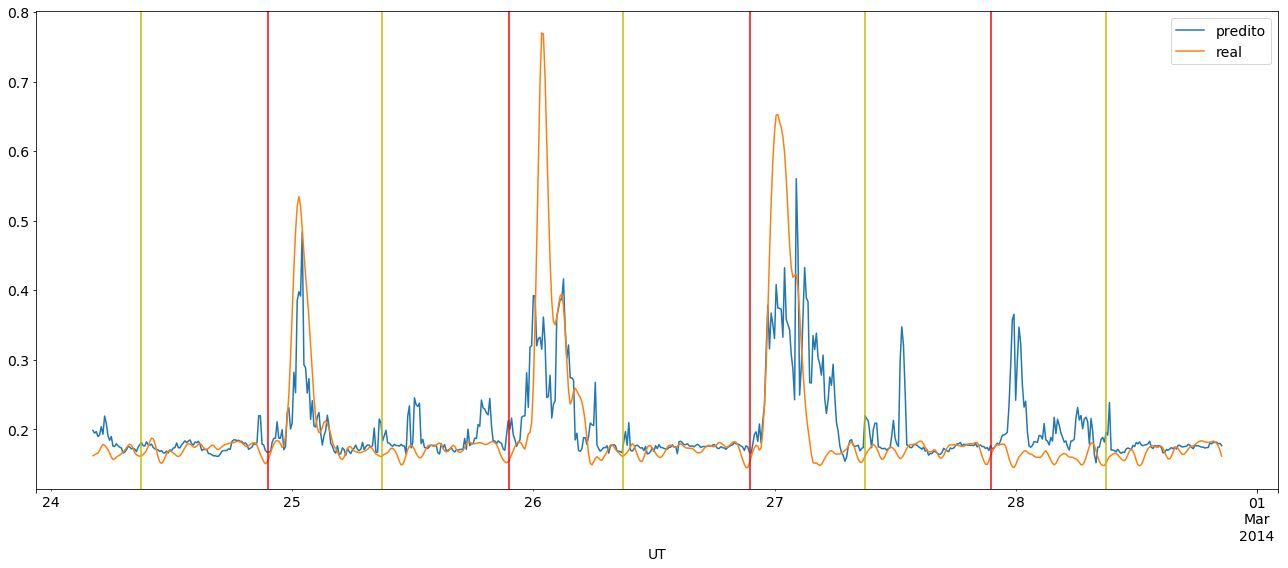

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predito'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predito'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(18, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()
plt.savefig('./images/regression_random_florest.eps', format='eps', dpi=1000)

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00140722 -0.00116042 -0.00136958 -0.00152626 -0.00175856 -0.00142953
 -0.00155625 -0.00107605 -0.00140702 -0.00150084] 

O erro quadrático médio foi: 0.001341
O erro quadrático total foi: 2.197243
O maior erro por previsão foi: 0.337529
O erro relativo foi: 8.706465%
O número de verdadeiros negativos foi: 2916
O número de verdadeiros positivos foi: 254
O número de falsos negativos foi: 123
O número de falsos positivos foi: 307
O POD foi: 0.673740
O FAR foi: 0.547237
A ACC foi: 0.880556
O kappa foi: 0.033692

Error for the time series sample:
O erro quadrático médio foi: 0.005149
O erro quadrático total foi: 1.864373
O maior erro por previsão foi: 0.418170
O erro relativo foi: 17.777780%
O número de verdadeiros negativos foi: 468
O número de verdadeiros positivos foi: 71
O número de falsos negativos foi: 13
O número de falsos positivos foi: 123
O POD foi: 0.845238
O FAR foi: 0.634021
A ACC foi: 0.798519
O kappa foi: 0.032520


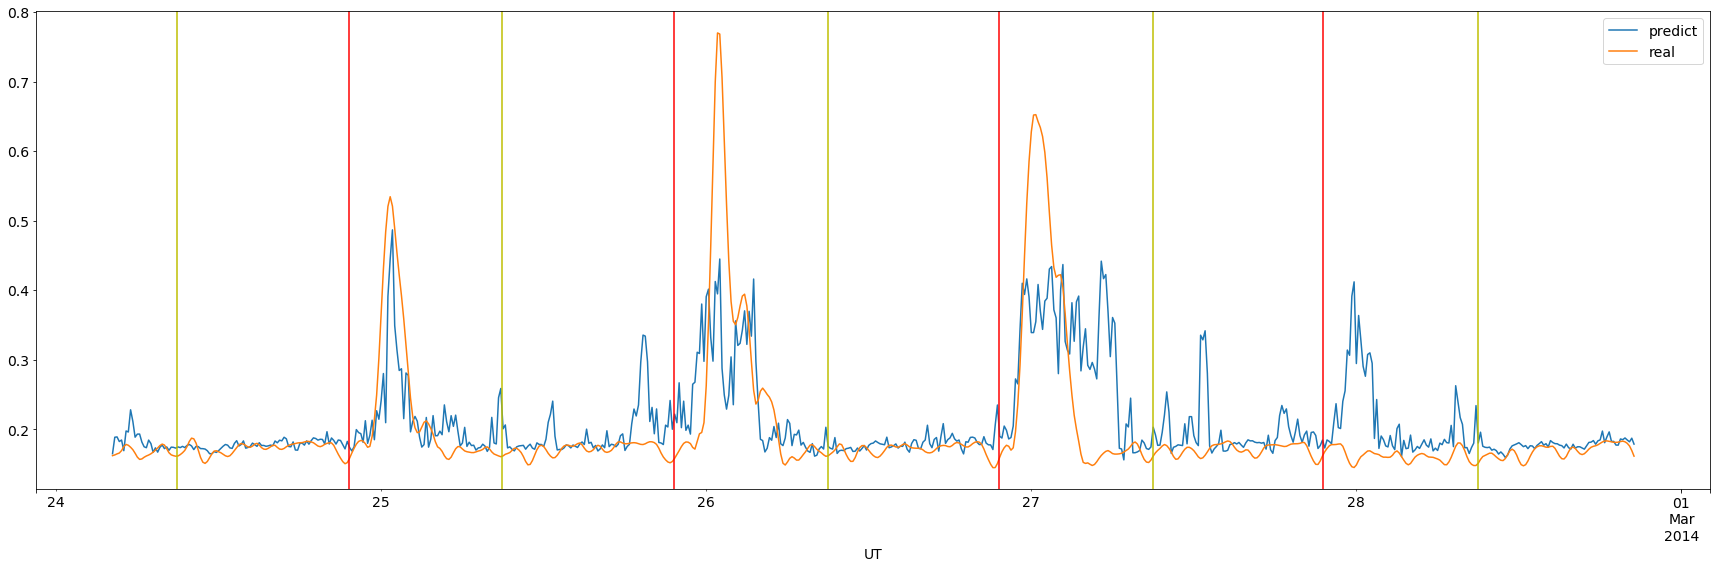

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00100266 -0.00096686 -0.00110755 -0.0011537  -0.00135018 -0.0012041
 -0.00139431 -0.00101214 -0.00099835 -0.00117056] 

O erro quadrático médio foi: 0.001087
O erro quadrático total foi: 1.977897
O maior erro por previsão foi: 0.308290
O erro relativo foi: 7.500461%
O número de verdadeiros negativos foi: 2988
O número de verdadeiros positivos foi: 280
O número de falsos negativos foi: 97
O número de falsos positivos foi: 235
O POD foi: 0.742706
O FAR foi: 0.456311
A ACC foi: 0.907778
O kappa foi: 0.027441

Error for the time series sample:
O erro quadrático médio foi: 0.005468
O erro quadrático total foi: 1.921224
O maior erro por previsão foi: 0.526896
O erro relativo foi: 14.812330%
O número de verdadeiros negativos foi: 512
O número de verdadeiros positivos foi: 78
O número de falsos negativos foi: 6
O número de falsos positivos foi: 79
O POD foi: 0.928571
O FAR foi: 0.503185
A ACC foi: 0.874074
O kappa foi: 0.020267


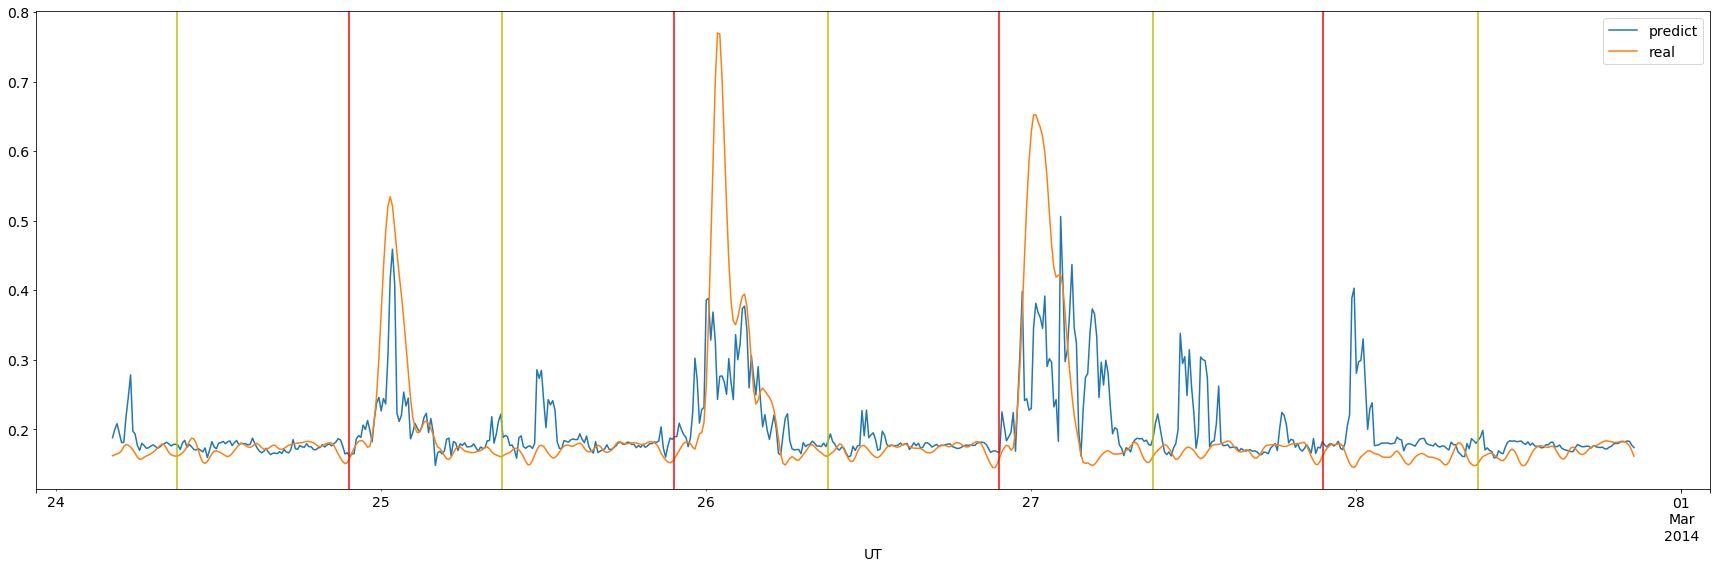

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00110569 -0.00093152 -0.00114249 -0.00137409 -0.00105814 -0.00119491
 -0.00119437 -0.00092433 -0.00097967 -0.00116861] 

O erro quadrático médio foi: 0.001011
O erro quadrático total foi: 1.907478
O maior erro por previsão foi: 0.354666
O erro relativo foi: 7.158912%
O número de verdadeiros negativos foi: 2969
O número de verdadeiros positivos foi: 302
O número de falsos negativos foi: 75
O número de falsos positivos foi: 254
O POD foi: 0.801061
O FAR foi: 0.456835
A ACC foi: 0.908611
O kappa foi: 0.023101

Error for the time series sample:
O erro quadrático médio foi: 0.004873
O erro quadrático total foi: 1.813604
O maior erro por previsão foi: 0.416733
O erro relativo foi: 14.966551%
O número de verdadeiros negativos foi: 496
O número de verdadeiros positivos foi: 70
O número de falsos negativos foi: 14
O número de falsos positivos foi: 95
O POD foi: 0.833333
O FAR foi: 0.575758
A ACC foi: 0.838519
O kappa foi: 0.029836


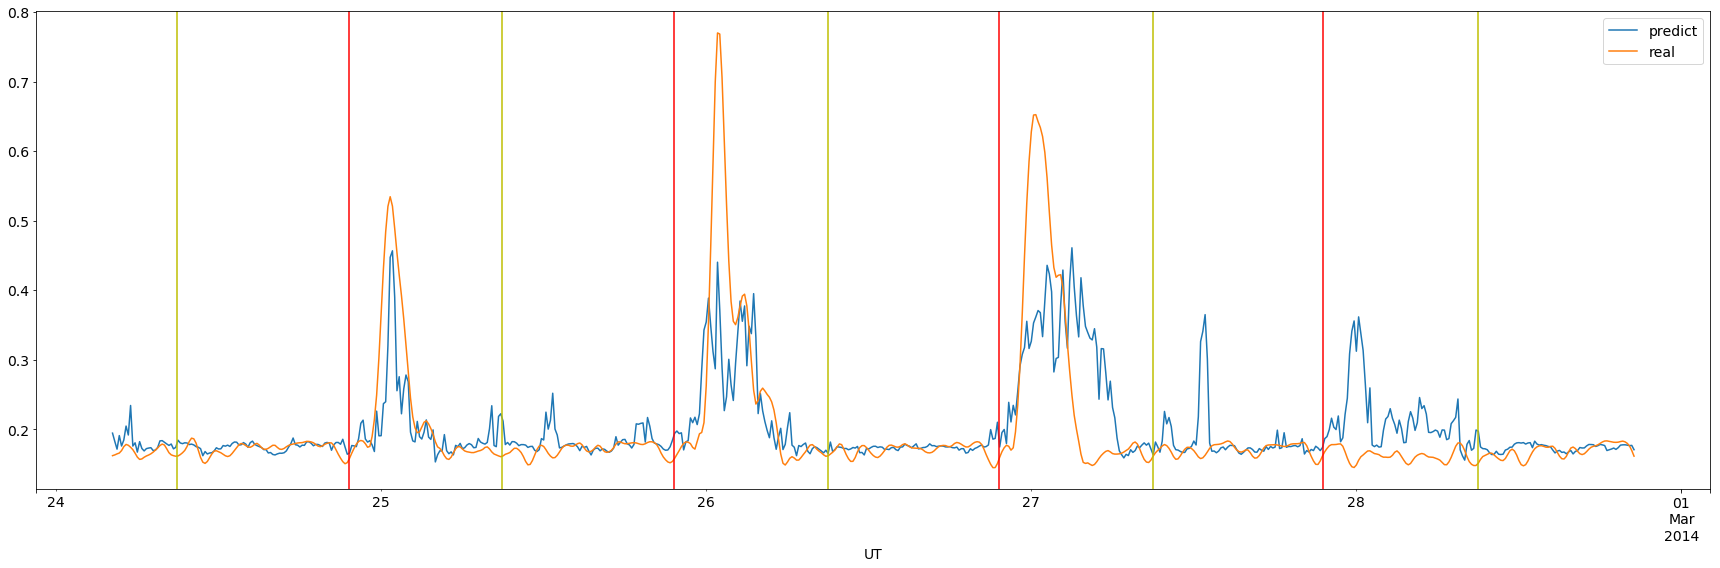

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00133026 -0.00111656 -0.00142371 -0.00146076 -0.00126732 -0.00146147
 -0.00132455 -0.00102255 -0.00119827 -0.00136592] 

O erro quadrático médio foi: 0.001170
O erro quadrático total foi: 2.052720
O maior erro por previsão foi: 0.365116
O erro relativo foi: 7.913746%
O número de verdadeiros negativos foi: 2918
O número de verdadeiros positivos foi: 278
O número de falsos negativos foi: 99
O número de falsos positivos foi: 305
O POD foi: 0.737401
O FAR foi: 0.523156
A ACC foi: 0.887778
O kappa foi: 0.028833

Error for the time series sample:
O erro quadrático médio foi: 0.005725
O erro quadrático total foi: 1.965846
O maior erro por previsão foi: 0.430806
O erro relativo foi: 16.219487%
O número de verdadeiros negativos foi: 470
O número de verdadeiros positivos foi: 68
O número de falsos negativos foi: 16
O número de falsos positivos foi: 121
O POD foi: 0.809524
O FAR foi: 0.640212
A ACC foi: 0.797037
O kappa foi: 0.034564


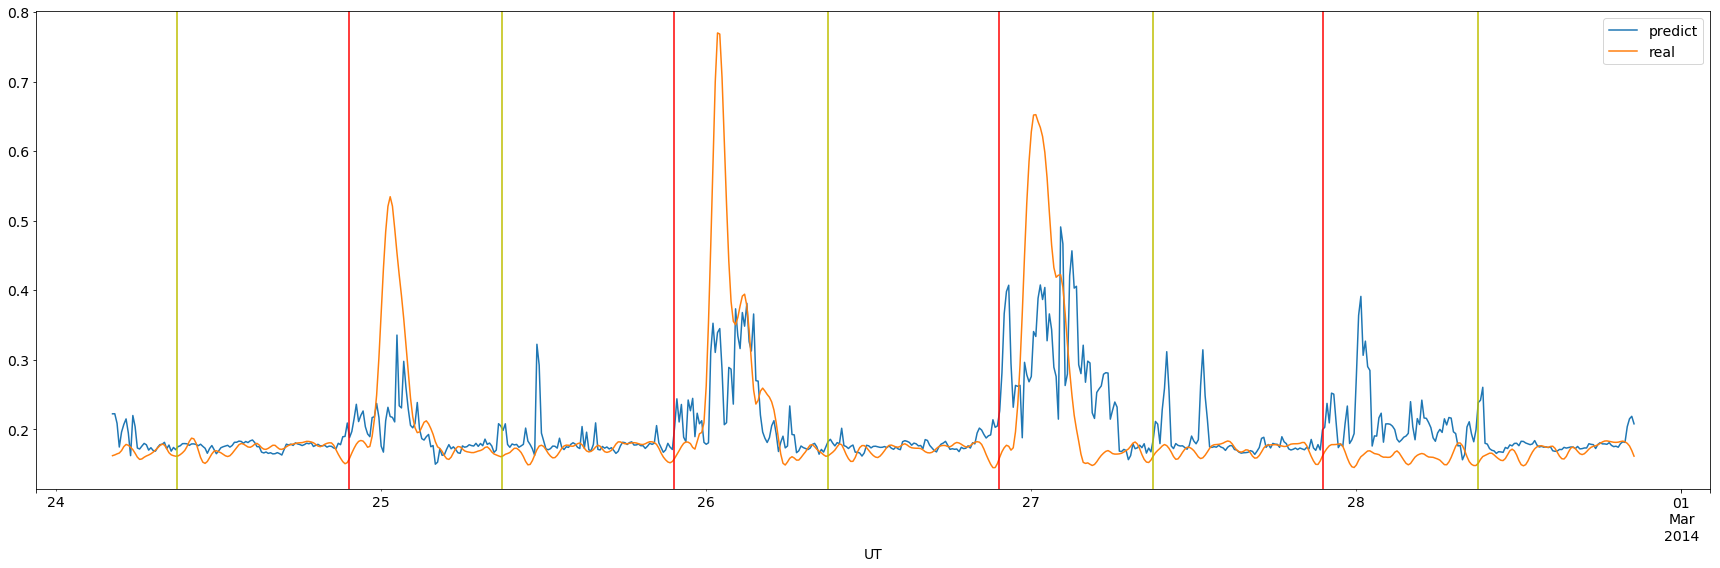

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00122134 -0.00101509 -0.00119928 -0.00127827 -0.0014425  -0.00136423
 -0.00148878 -0.00079134 -0.00117894 -0.0011752 ] 

O erro quadrático médio foi: 0.001095
O erro quadrático total foi: 1.985568
O maior erro por previsão foi: 0.390714
O erro relativo foi: 7.354262%
O número de verdadeiros negativos foi: 2971
O número de verdadeiros positivos foi: 298
O número de falsos negativos foi: 79
O número de falsos positivos foi: 252
O POD foi: 0.790451
O FAR foi: 0.458182
A ACC foi: 0.908056
O kappa foi: 0.023905

Error for the time series sample:
O erro quadrático médio foi: 0.005537
O erro quadrático total foi: 1.933178
O maior erro por previsão foi: 0.512485
O erro relativo foi: 13.846341%
O número de verdadeiros negativos foi: 519
O número de verdadeiros positivos foi: 70
O número de falsos negativos foi: 14
O número de falsos positivos foi: 72
O POD foi: 0.833333
O FAR foi: 0.507042
A ACC foi: 0.872593
O kappa foi: 0.027009


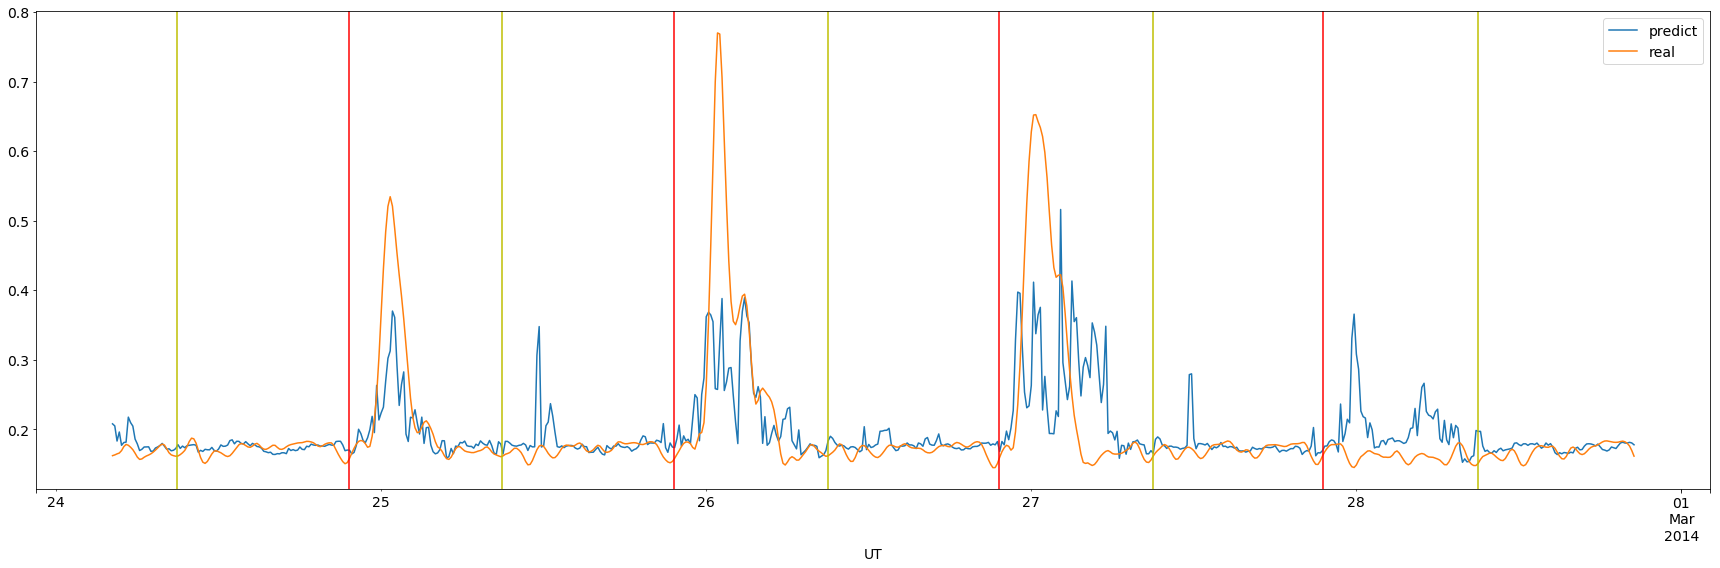

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00122696 -0.00091633 -0.00119197 -0.00144155 -0.00148653 -0.00176206
 -0.00139547 -0.00101518 -0.00131419 -0.00129258] 

O erro quadrático médio foi: 0.001289
O erro quadrático total foi: 2.153930
O maior erro por previsão foi: 0.331937
O erro relativo foi: 8.272268%
O número de verdadeiros negativos foi: 2903
O número de verdadeiros positivos foi: 288
O número de falsos negativos foi: 89
O número de falsos positivos foi: 320
O POD foi: 0.763926
O FAR foi: 0.526316
A ACC foi: 0.886389
O kappa foi: 0.027047

Error for the time series sample:
O erro quadrático médio foi: 0.005516
O erro quadrático total foi: 1.929637
O maior erro por previsão foi: 0.478577
O erro relativo foi: 16.093280%
O número de verdadeiros negativos foi: 479
O número de verdadeiros positivos foi: 77
O número de falsos negativos foi: 7
O número de falsos positivos foi: 112
O POD foi: 0.916667
O FAR foi: 0.592593
A ACC foi: 0.823704
O kappa foi: 0.026287


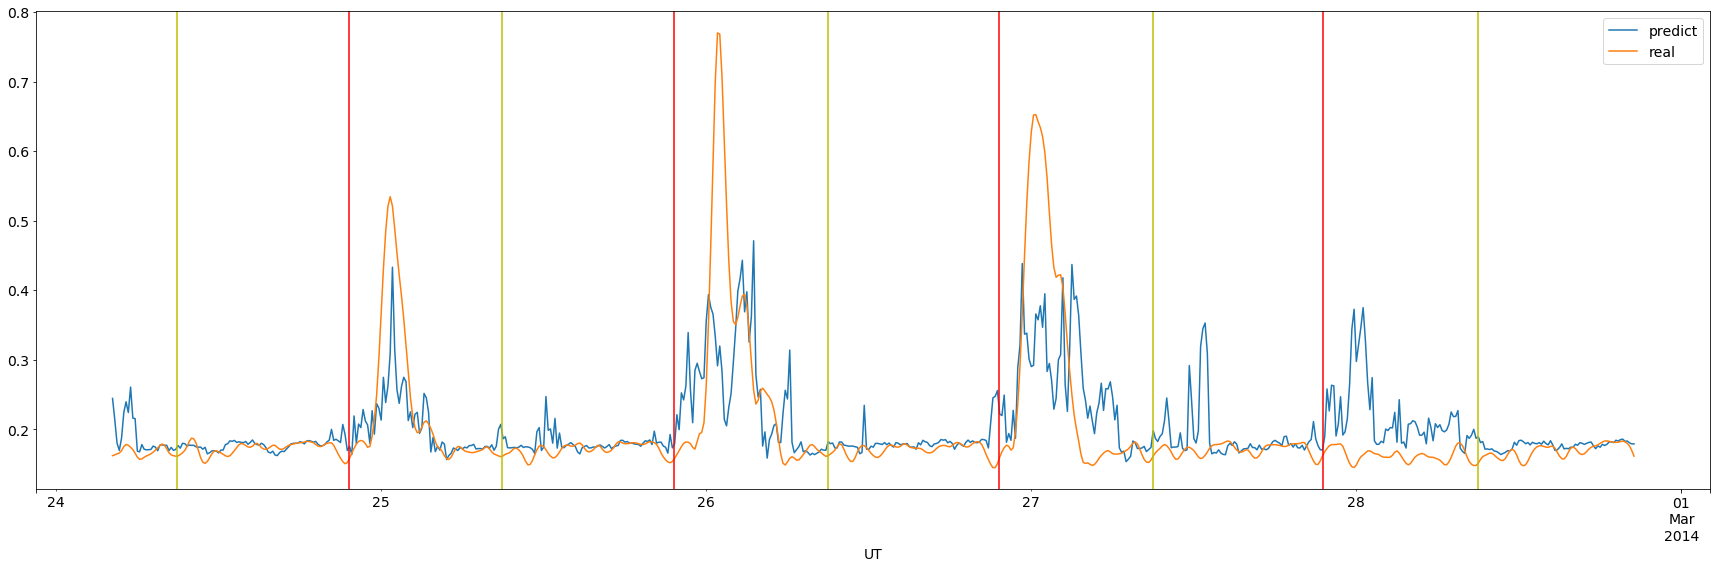

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00116851 -0.00093227 -0.00130105 -0.00118528 -0.00127263 -0.00135693
 -0.00130308 -0.00095282 -0.00099802 -0.0011183 ] 

O erro quadrático médio foi: 0.001107
O erro quadrático total foi: 1.996611
O maior erro por previsão foi: 0.324289
O erro relativo foi: 7.427734%
O número de verdadeiros negativos foi: 2984
O número de verdadeiros positivos foi: 299
O número de falsos negativos foi: 78
O número de falsos positivos foi: 239
O POD foi: 0.793103
O FAR foi: 0.444238
A ACC foi: 0.911944
O kappa foi: 0.023473

Error for the time series sample:
O erro quadrático médio foi: 0.005596
O erro quadrático total foi: 1.943563
O maior erro por previsão foi: 0.508137
O erro relativo foi: 14.806098%
O número de verdadeiros negativos foi: 515
O número de verdadeiros positivos foi: 79
O número de falsos negativos foi: 5
O número de falsos positivos foi: 76
O POD foi: 0.940476
O FAR foi: 0.490323
A ACC foi: 0.880000
O kappa foi: 0.018829


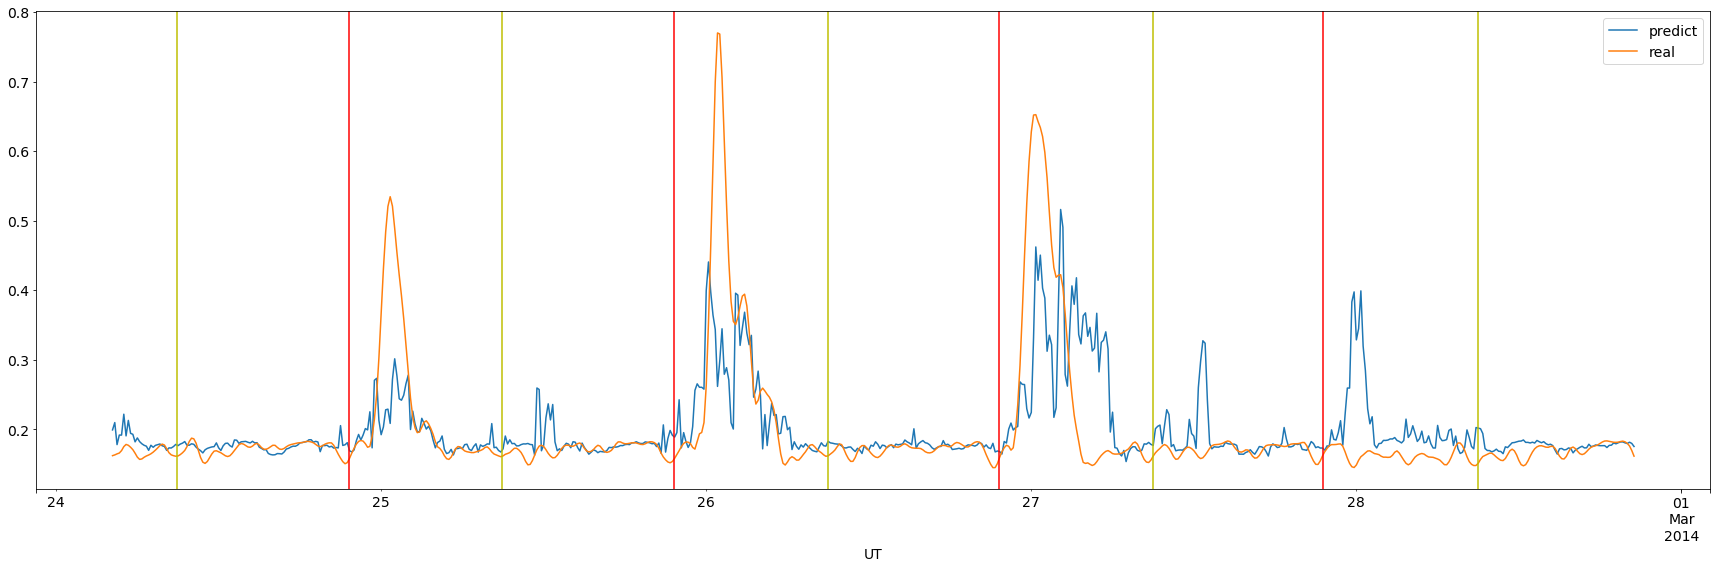

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
ax = df_aux.plot(figsize=(24, 8));
plt.xlabel('UT')

lat, long = location_station('sj2')
set_of_sunrise = find_set_sunrise(df_aux, lat, long)
set_of_sunset = find_set_sunset(df_aux, lat, long)
for i in set_of_sunrise:
    ax.axvline(x=i, color='y')
for i in set_of_sunset[0:-1]:
    ax.axvline(x=i, color='r')

plt.tight_layout()